___
# Ciência dos Dados - PROJETO 1

Rodrigo Gatti Coutinho
___

Acesso a Internet (e TV)- como a renda de uma regiao influencia no acesso a internet.

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Familia\Documents\insper\ciencia dos dados\CD17\Projeto1


In [5]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
dados= pd.read_csv('DOM2013.csv', sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [6]:
dados= dados.loc[:, ["UF","V4621","V0201","V0202","V02322"]]
dados.to_csv("resumo.csv") #faz com que salve em um arquivo no excel
dados_nao_nulos= dados[pd.notnull(dados.V4621)&pd.notnull(dados.V0201)&pd.notnull(dados.UF)&pd.notnull(dados.V0202)&pd.notnull(dados.V02322)]
dados_nao_nulos= dados_nao_nulos[dados.V4621!=999999999999]
dados_nao_nulos.head()

C:\Users\Familia\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,UF,V4621,V0201,V0202,V02322
2,11,350.0,1.0,4.0,4.0
3,11,339.0,1.0,2.0,4.0
4,11,266.0,1.0,2.0,4.0
5,11,400.0,1.0,2.0,4.0
6,11,411.0,1.0,2.0,4.0


In [7]:
#mudança categorias
dados_nao_nulos.UF = dados.UF.astype('category')
dados_nao_nulos.UF.cat.categories= (['Rondônia', 'Acre','Amazonas', 'Roraima','Pará', 'Amapá','Tocantis', 'Maranhão','Piauí', 'Ceará','Rio Grande do Norte', 'Paraíba','Pernambuco', 'Alagoas','Sergipe', 'Bahia','Minas Gerais', 'Espírito Santo','Rio de Janeiro', 'São Paulo','Paraná', 'Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul','Mato Grosso', 'Goiás' , 'Distrito Federal'])
dados_nao_nulos.V02322 = dados.V02322.astype('category')
dados_nao_nulos.V02322.cat.categories= (['Sim', 'Não'])
dados_nao_nulos.V0201 = dados.V0201.astype('category')
dados_nao_nulos.V0201.cat.categories= (['Particular Permanente', 'Particular Improvisado', 'Coletivo'])
dados_nao_nulos.V0202 = dados.V0202.astype('category')
dados_nao_nulos.V0202.cat.categories= (['Casa', 'Apartamento', 'Comodo'])
dados_nao_nulos.head()

,UF,V4621,V0201,V0202,V02322
2,Rondônia,350.0,Particular Permanente,Apartamento,Não
3,Rondônia,339.0,Particular Permanente,Casa,Não
4,Rondônia,266.0,Particular Permanente,Casa,Não
5,Rondônia,400.0,Particular Permanente,Casa,Não
6,Rondônia,411.0,Particular Permanente,Casa,Não


In [8]:
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Rondônia') | (dados_nao_nulos.UF=='Acre') | (dados_nao_nulos.UF=='Amazonas') | (dados_nao_nulos.UF=='Roraima') | (dados_nao_nulos.UF=='Pará') | (dados_nao_nulos.UF=='Amapá') | (dados_nao_nulos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Maranhão') | (dados_nao_nulos.UF=='Piaui') | (dados_nao_nulos.UF=='Caerá') | (dados_nao_nulos.UF=='Rio Grande do Norte') | (dados_nao_nulos.UF=='Paraíba') | (dados_nao_nulos.UF=='Pernambuco') | (dados_nao_nulos.UF=='Alagoas') | (dados_nao_nulos.UF=='Sergipe') | (dados_nao_nulos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Minas Gerais') | (dados_nao_nulos.UF=='Espirito Santo') | (dados_nao_nulos.UF=='Rio de Janeiro') | (dados_nao_nulos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Paraná') | (dados_nao_nulos.UF=='Santa Catarina') | (dados_nao_nulos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Mato Grosso do Sul') | (dados_nao_nulos.UF=='Mato Grosso') | (dados_nao_nulos.UF=='Goiás') | (dados_nao_nulos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'
dados_nao_nulos.head()

,UF,V4621,V0201,V0202,V02322,Regiao
2,Rondônia,350.0,Particular Permanente,Apartamento,Não,Norte
3,Rondônia,339.0,Particular Permanente,Casa,Não,Norte
4,Rondônia,266.0,Particular Permanente,Casa,Não,Norte
5,Rondônia,400.0,Particular Permanente,Casa,Não,Norte
6,Rondônia,411.0,Particular Permanente,Casa,Não,Norte


In [9]:
#moda dos tipos de domicilio-V0202
dados_filtrados = dados_nao_nulos.V0202.mode()
dados_filtrados

0    Casa
dtype: category
Categories (3, object): [Casa, Apartamento, Comodo]

In [10]:
#moda especie domicilio- V0201
dados_filtrados1 = dados_nao_nulos.V0201.mode()
dados_filtrados1

0    Particular Permanente
dtype: category
Categories (3, object): [Particular Permanente, Particular Improvisado, Coletivo]

In [32]:
#criar novo arquivo com as modas de cada estado
dadosfiltrados= dados_nao_nulos[(dados_nao_nulos.V0201== 'Particular Permanente')|(dados_nao_nulos.V0201== 'Particular Improvisado') & (dados_nao_nulos.V0202== 'Casa') | (dados_nao_nulos.V0202=='Apartamento')]
dadosfiltrados

,UF,V4621,V0201,V0202,V02322,Regiao
2,Rondônia,350.0,Particular Permanente,Apartamento,Não,Norte
3,Rondônia,339.0,Particular Permanente,Casa,Não,Norte
4,Rondônia,266.0,Particular Permanente,Casa,Não,Norte
5,Rondônia,400.0,Particular Permanente,Casa,Não,Norte
6,Rondônia,411.0,Particular Permanente,Casa,Não,Norte
7,Rondônia,1333.0,Particular Permanente,Casa,Sim,Norte
8,Rondônia,1750.0,Particular Permanente,Casa,Sim,Norte
9,Rondônia,1300.0,Particular Permanente,Apartamento,Sim,Norte
10,Rondônia,280.0,Particular Permanente,Casa,Não,Norte
11,Rondônia,333.0,Particular Permanente,Casa,Não,Norte


In [33]:
#grafico de quantidade de sim ou nao por regiao
tabelanorte= dadosfiltrados[dadosfiltrados.Regiao=='Norte']
tabelanorte.head()

,UF,V4621,V0201,V0202,V02322,Regiao
2,Rondônia,350.0,Particular Permanente,Apartamento,Não,Norte
3,Rondônia,339.0,Particular Permanente,Casa,Não,Norte
4,Rondônia,266.0,Particular Permanente,Casa,Não,Norte
5,Rondônia,400.0,Particular Permanente,Casa,Não,Norte
6,Rondônia,411.0,Particular Permanente,Casa,Não,Norte


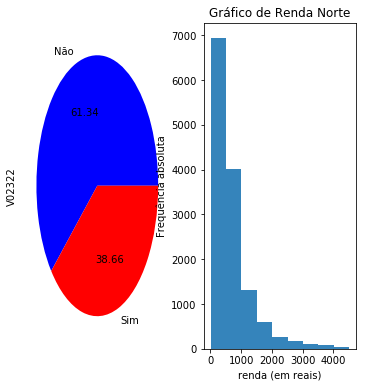

In [34]:
plt.subplot(121)
tabelanorte1= tabelanorte.V02322.value_counts()
tabelanorte1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.subplot(122)
faixa = range(10,5000,500)
renda_Nordeste = pd.cut(tabelanorte.V4621, bins=faixa)
renda_Nordeste.value_counts(sort=False, normalize=True)*100
plot = tabelanorte.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Norte', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [35]:
tabelanordeste= dadosfiltrados[dadosfiltrados.Regiao=='Nordeste']
tabelanordeste.head()

,UF,V4621,V0201,V0202,V02322,Regiao
21219,Maranhão,1534.0,Particular Permanente,Casa,Não,Nordeste
21220,Maranhão,254.0,Particular Permanente,Casa,Não,Nordeste
21221,Maranhão,452.0,Particular Permanente,Casa,Não,Nordeste
21223,Maranhão,240.0,Particular Permanente,Casa,Não,Nordeste
21224,Maranhão,158.0,Particular Permanente,Casa,Não,Nordeste


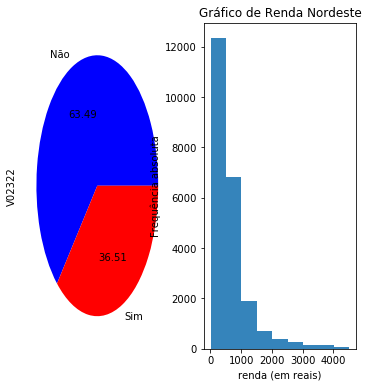

In [36]:
plt.subplot(121)
tabelanordeste1= tabelanordeste.V02322.value_counts()
tabelanordeste1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.subplot(122)
faixa = range(10,5000,500)
renda_Nordeste = pd.cut(tabelanordeste.V4621, bins=faixa)
renda_Nordeste.value_counts(sort=False, normalize=True)*100
plot = tabelanordeste.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Nordeste', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [37]:
tabelasudeste= dadosfiltrados[dadosfiltrados.Regiao=='Sudeste']
tabelasudeste.head()

,UF,V4621,V0201,V0202,V02322,Regiao
63842,Minas Gerais,1281.0,Particular Permanente,Casa,Não,Sudeste
63843,Minas Gerais,729.0,Particular Permanente,Casa,Sim,Sudeste
63844,Minas Gerais,2750.0,Particular Permanente,Casa,Sim,Sudeste
63845,Minas Gerais,678.0,Particular Permanente,Casa,Não,Sudeste
63846,Minas Gerais,421.0,Particular Permanente,Apartamento,Sim,Sudeste


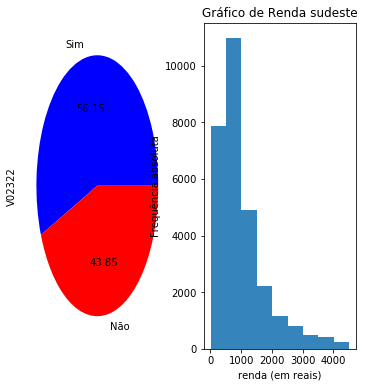

In [38]:
plt.subplot(121)
tabelasudeste1= tabelasudeste.V02322.value_counts()
tabelasudeste1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sudeste = pd.cut(tabelasudeste.V4621, bins=faixa)
renda_Sudeste.value_counts(sort=False, normalize=True)*100
plot = tabelasudeste.V4621.plot.hist(bins=faixa,title='Gráfico de Renda sudeste', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [39]:
tabelasul= dadosfiltrados[dadosfiltrados.Regiao=='Sul']
tabelasul.head()

,UF,V4621,V0201,V0202,V02322,Regiao
108606,Paraná,1650.0,Particular Permanente,Casa,Sim,Sul
108607,Paraná,400.0,Particular Permanente,Casa,Não,Sul
108608,Paraná,833.0,Particular Permanente,Casa,Não,Sul
108609,Paraná,347.0,Particular Permanente,Casa,Não,Sul
108610,Paraná,678.0,Particular Permanente,Casa,Não,Sul


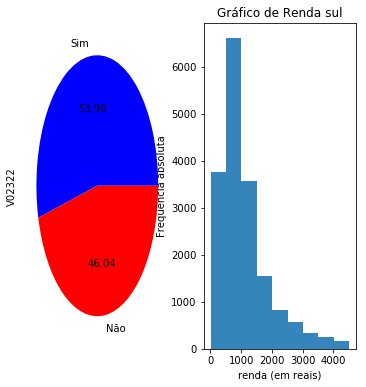

In [40]:
plt.subplot(121)
tabelasul1= tabelasul.V02322.value_counts()
tabelasul1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sul = pd.cut(tabelasul.V4621, bins=faixa)
renda_Sul.value_counts(sort=False, normalize=True)*100
plot = tabelasul.V4621.plot.hist(bins=faixa,title='Gráfico de Renda sul', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [41]:
tabelacentroeste= dadosfiltrados[dadosfiltrados.Regiao=='Centroeste']
tabelacentroeste.head()

,UF,V4621,V0201,V0202,V02322,Regiao
132718,Mato Grosso do Sul,5000.0,Particular Permanente,Casa,Não,Centroeste
132720,Mato Grosso do Sul,760.0,Particular Permanente,Casa,Sim,Centroeste
132721,Mato Grosso do Sul,364.0,Particular Permanente,Casa,Não,Centroeste
132722,Mato Grosso do Sul,1300.0,Particular Permanente,Casa,Sim,Centroeste
132723,Mato Grosso do Sul,4339.0,Particular Permanente,Casa,Sim,Centroeste


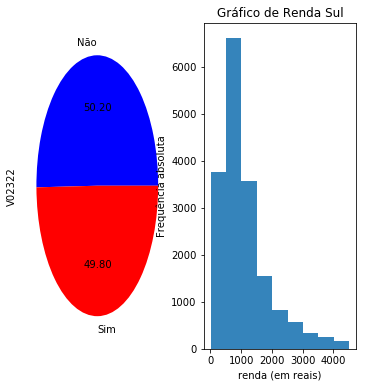

In [42]:
plt.subplot(121)
tabelacentroeste1= tabelacentroeste.V02322.value_counts()
tabelacentroeste1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sul = pd.cut(tabelasul.V4621, bins=faixa)
renda_Sul.value_counts(sort=False, normalize=True)*100
plot = tabelasul.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Sul', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [43]:
#fazer a media das rendas de cada regiao

In [44]:
#regiao norte
tabelanorte['V4621'].mean()

790.1725382003395

In [45]:
#regiao nordeste
tabelanordeste['V4621'].mean()

789.7048248568542

In [46]:
#regiao sudeste
tabelasudeste['V4621'].mean()

1330.331291310656

In [47]:
#regiao sul
tabelasul['V4621'].mean()

1396.3934637021162

In [48]:
#regiao centroeste
tabelacentroeste['V4621'].mean()

1402.8898111289914

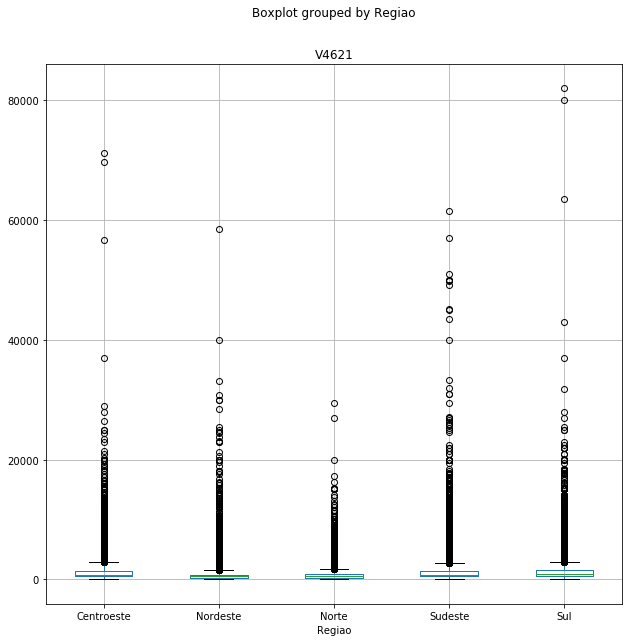

In [49]:
dadosfiltrados.boxplot(column="V4621",  by="Regiao", figsize=(10,10))

In [2]:
#histogtama de cada regiao por renda

___
## Conclusão 

Descreva aqui suas conclusões!